In [1]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

import pystan
import pystan.chains
from collections import OrderedDict
import pandas as pd

plt.style.use('seaborn-darkgrid')
print('Runing on PyMC3 v{}'.format(pm.__version__))

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Runing on PyMC3 v3.3


# Effective sample size in PyStan

Reference implementation in PyStan: [pystan/_chains.pyx
](https://github.com/stan-dev/pystan/blob/develop/pystan/_chains.pyx)
(related PR: https://github.com/stan-dev/pystan/pull/415)

In [2]:
f1 = '/usr/local/lib/python3.5/dist-packages/pystan/tests/data/blocker.1.csv'
f2 = '/usr/local/lib/python3.5/dist-packages/pystan/tests/data/blocker.2.csv'

# f1 = '/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pystan/tests/data/blocker.1.csv'
# f2 = '/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pystan/tests/data/blocker.2.csv'

# read csv using numpy
c1 = np.loadtxt(f1, skiprows=41, delimiter=',')[:, 4:]
c1_colnames = open(f1, 'r').readlines()[36].strip().split(',')[4:]
np.testing.assert_equal(c1_colnames[0], 'd')
c2 = np.loadtxt(f2, skiprows=41, delimiter=',')[:, 4:]
c2_colnames = open(f2, 'r').readlines()[36].strip().split(',')[4:]
np.testing.assert_equal(c1_colnames, c2_colnames)
np.testing.assert_equal(len(c1_colnames), c1.shape[1])

n_samples = len(c1)
np.testing.assert_equal(n_samples, 1000)

c1 = OrderedDict((k, v) for k, v in zip(c1_colnames, c1.T))
c2 = OrderedDict((k, v) for k, v in zip(c2_colnames, c2.T))

lst = dict(fnames_oi=c1_colnames, samples=[{'chains': c1}, {'chains': c2}],
           n_save=np.repeat(n_samples, 2), permutation=None,
           warmup=0, warmup2=[0, 0], chains=2, n_flatnames=len(c1))

In [34]:
n_eff = [
    466.099, 136.953, 1170.390, 541.256,
    518.051, 589.244, 764.813, 688.294,
    323.777, 502.892, 353.823, 588.142,
    654.336, 480.914, 176.978, 182.649,
    642.389, 470.949, 561.947, 581.187,
    446.389, 397.641, 338.511, 678.772,
    1442.250, 837.956, 869.865, 951.124,
    619.336, 875.805, 233.260, 786.568,
    910.144, 231.582, 907.666, 747.347,
    720.660, 195.195, 944.547, 767.271,
    723.665, 1077.030, 470.903, 954.924,
    497.338, 583.539, 697.204, 98.421
]

ess = []
for i in range(len(n_eff)):
    ess.append(pystan.chains.ess(lst, i))
    np.testing.assert_almost_equal(ess[i], n_eff[i], 2)

In [35]:
df_neff = pd.DataFrame(data=dict(Target=n_eff, PyStan=ess),
                       columns=['Target', 'PyStan'])
df_neff

,Target,PyStan
0,466.099,466.098810
1,136.953,136.952532
2,1170.390,1170.393732
3,541.256,541.255659
4,518.051,518.051325
5,589.244,589.243546
6,764.813,764.812721
7,688.294,688.293542
8,323.777,323.777181
9,502.892,502.891905


In [36]:
lst.keys()

dict_keys(['permutation', 'n_save', 'warmup2', 'warmup', 'fnames_oi', 'n_flatnames', 'chains', 'samples'])

In [37]:
slst = lst['samples'][0]['chains']
slst.keys()

odict_keys(['d', 'sigmasq_delta', 'mu.1', 'mu.2', 'mu.3', 'mu.4', 'mu.5', 'mu.6', 'mu.7', 'mu.8', 'mu.9', 'mu.10', 'mu.11', 'mu.12', 'mu.13', 'mu.14', 'mu.15', 'mu.16', 'mu.17', 'mu.18', 'mu.19', 'mu.20', 'mu.21', 'mu.22', 'delta.1', 'delta.2', 'delta.3', 'delta.4', 'delta.5', 'delta.6', 'delta.7', 'delta.8', 'delta.9', 'delta.10', 'delta.11', 'delta.12', 'delta.13', 'delta.14', 'delta.15', 'delta.16', 'delta.17', 'delta.18', 'delta.19', 'delta.20', 'delta.21', 'delta.22', 'delta_new', 'sigma_delta'])

In [38]:
param_names = list(slst.keys())

In [39]:
slst['d'].shape

(1000,)

In [40]:
from copy import deepcopy
sim = deepcopy(lst)

In [41]:
m = sim['chains']

ns_save = sim['n_save']
ns_warmup2 = sim['warmup2']
ns_kept = [s - w for s, w in zip(sim['n_save'], sim['warmup2'])]

n_samples = min(ns_kept)

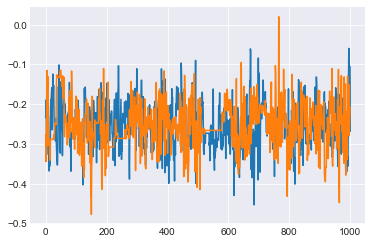

In [42]:
for im in range(m):
    plt.plot(sim['samples'][im]['chains']['d']);

# Validate PyStan autocov implementation

In [14]:
# test autocovariance function
chain = 0
var_id = 5
stan_acov = pystan._chains._test_autocovariance(sim, chain, var_id)

In [15]:
len(stan_acov)

1000

In [16]:
print(pystan.chains.ess(sim, var_id))

589.2435463598366


In [17]:
"""get_kept_samples function in pystan"""
# xtrace = []
# nv = slst[param_names[var_id]]
# for i in range(nv.shape[0] - ns_warmup2[chain]):
#     xtrace.append(nv[ns_warmup2[chain] + i])
# xtrace = np.asarray(xtrace)
varname = param_names[var_id]
xtrace = sim['samples'][chain]['chains'][varname]
pymc_acov = [pm.stats.autocov(xtrace, lag)[0, 1] for lag in range(1, len(xtrace))]

In [16]:
import scipy.fftpack as fft


def autocorr(x):
    """
    Compute autocorrelation using FFT
    https://en.wikipedia.org/wiki/Autocorrelation#Efficient_computation
    """
    x = np.asarray(x)
    x = x - x.mean()
    N = len(x)
    s = fft.fft(x, N * 2 - 1)
    result = np.real(fft.ifft(s * np.conjugate(s), N * 2 - 1))
    result = result[:N]
    result /= (N - np.arange(N))
    result /= result[0]
    return result


def autocov(x):
    acorr = autocorr(x)
    varx = np.var(x) * (len(x) - 1) / len(x)
    return acorr * varx


from scipy.signal import fftconvolve


def autocorr2(x):
    x -= x.mean()
    N = len(x)
    result = fftconvolve(x, x[::-1])
    result = result[len(result) // 2:]
    result /= (N - np.arange(N))
    result /= result[0]
    return result


def autocov2(x):
    acorr = autocorr2(x)
    varx = np.var(x) * (len(x) - 1) / len(x)
    return acorr * varx


acov_ = autocov2(xtrace)
acov_.shape

(1000,)

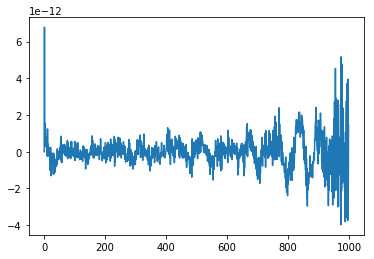

In [17]:
# plt.plot(autocorr(xtrace))
# plt.plot(autocorr2(xtrace));
plt.plot(autocorr(xtrace)-autocorr2(xtrace));

In [17]:
x = np.random.randn(50000)
%timeit autocorr(x)
%timeit autocorr2(x)

40.1 ms ± 7.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
8.66 ms ± 963 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


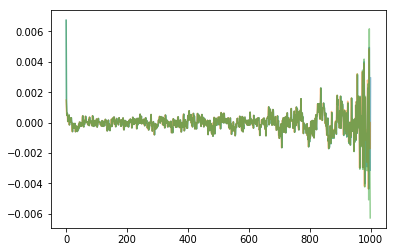

In [18]:
plt.plot(np.array(stan_acov), alpha=.5)
plt.plot(np.array(pymc_acov), alpha=.5)
# plt.plot(autocov(xtrace), alpha=.5)
plt.plot(autocov2(xtrace), alpha=.5)
plt.legend();

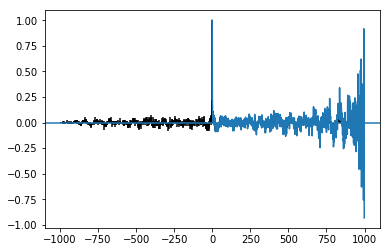

In [19]:
varx = np.var(xtrace) * (len(xtrace) - 1) / len(xtrace)
plt.plot(autocorr(xtrace))
plt.acorr(xtrace, maxlags=len(xtrace)-1);

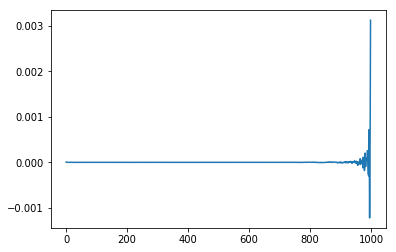

In [20]:
plt.plot(np.array(stan_acov) - acov_);

In [21]:
np.array(stan_acov)[:10]-acov_[:10]

array([6.73236482e-06, 1.48075489e-06, 7.58685726e-07, 4.70895834e-07,
       6.04710304e-07, 4.28244370e-07, 6.86514530e-08, 1.72115005e-07,
       3.77783193e-07, 3.20454776e-07])

In [22]:
np.array(stan_acov)[:10]-np.array(pymc_acov)[:10]

array([ 5.25012914e-03,  7.22023683e-04,  2.87883077e-04, -1.34830252e-04,
        1.76743775e-04,  3.61355678e-04, -1.04268796e-04, -2.07522966e-04,
        5.74347246e-05, -1.76644106e-04])

# PyMC3 translation of PyStan effect_n

In [138]:
from scipy.signal import fftconvolve


def autocorr(x):
    """
    Compute autocorrelation using FFTfor every lag for the input array
    https://en.wikipedia.org/wiki/Autocorrelation#Efficient_computation

    Parameters
    ----------
    x : Numpy array
        A 1D array containing MCMC samples

    Returns
    -------
    acorr: Numpy array same size as the input array
    """
    y = x - x.mean()
    N = len(y)
    result = fftconvolve(y, y[::-1])
    acorr = result[len(result) // 2:]
    acorr /= (N - np.arange(N))
    acorr /= acorr[0]
    return acorr


def autocov(x):
    """Compute autocovariance estimates for every lag for 
    the input array

    Parameters
    ----------
    x : Numpy array
        A 1D array containing MCMC samples

    Returns
    -------
    acov: Numpy array same size as the input array
    """
    acorr = autocorr(x)
    varx = np.var(x, ddof=1) * (len(x) - 1) / len(x)
    return acorr * varx

In [156]:
var_id = 13 #22
stan_acov_ = deepcopy([pystan._chains._test_autocovariance(sim, im, var_id) for im in range(m)])

In [157]:
trace_values = deepcopy([sim['samples'][im]['chains'][param_names[var_id]]
                for im in range(m)])

x = np.array(trace_values, copy=True)
shape = x.shape

# Make sure to handle scalars correctly, adding extra dimensions if
# needed. We could use np.squeeze here, but we don't want to squeeze
# out dummy dimensions that a user inputs.
if len(shape) == 2:
    x = np.atleast_3d(trace_values)

# Transpose all dimensions, which makes the loop below
# easier by moving the axes of the variable to the front instead
# of the chain and sample axes.
x = x.transpose()

In [158]:
for tup in np.ndindex(*list(x.shape[:-2])):
    print(x[tup].shape)

(1000, 2)


In [159]:
trace_value = x[0].T
nchain, n_samples = trace_value.shape

acov = np.asarray([autocov(trace_value[chain]) for chain in range(nchain)])
# acov = np.asarray([stan_acov_[chain] for chain in range(nchain)])

chain_mean = np.mean(trace_value, axis=1)
chain_var = acov[:, 0] * n_samples / (n_samples - 1.)
acov_t = acov[:, 1] * n_samples / (n_samples - 1.)
mean_var = np.mean(chain_var)
var_plus = mean_var * (n_samples - 1.) / n_samples
var_plus += np.var(chain_mean, ddof=1)

rho_hat_t = np.zeros(n_samples)
rho_hat_even = 1.
rho_hat_t[0] = rho_hat_even
rho_hat_odd = 1. - (mean_var - np.mean(acov_t)) / var_plus
rho_hat_t[1] = rho_hat_odd
# Geyer's initial positive sequence
max_t = 1
t = 1
while t < (n_samples - 2) and (rho_hat_even + rho_hat_odd) >= 0:
    rho_hat_even = 1. - (mean_var - np.mean(acov[:, t + 1])) / var_plus
    rho_hat_odd = 1. - (mean_var - np.mean(acov[:, t + 2])) / var_plus
    if (rho_hat_even + rho_hat_odd) >= 0:
        rho_hat_t[t + 1] = rho_hat_even
        rho_hat_t[t + 2] = rho_hat_odd
    max_t = t + 2
    t += 2

# Geyer's initial monotone sequence
t = 3
while t <= max_t - 2:
    if (rho_hat_t[t + 1] + rho_hat_t[t + 2]) > (rho_hat_t[t - 1] + rho_hat_t[t]):
        rho_hat_t[t + 1] = (rho_hat_t[t - 1] + rho_hat_t[t]) / 2.
        rho_hat_t[t + 2] = rho_hat_t[t + 1]
    t += 2
ess = nchain * n_samples / (-1. + 2. * np.sum(rho_hat_t))

In [160]:
t = 3

rho_hat_t[t + 1:t+2+1]

array([0.10813589, 0.10059381])

In [161]:
ess

480.85717493322215

In [162]:
pystan._chains.effective_sample_size(sim, var_id)

480.9143305252679

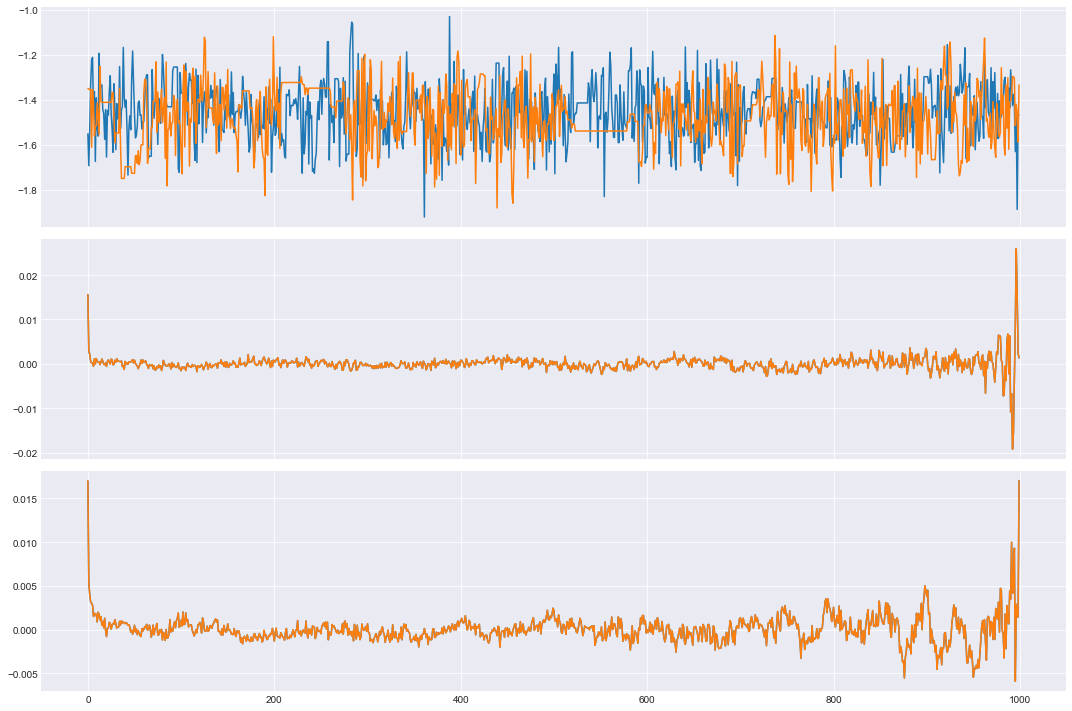

In [163]:
_, axes = plt.subplots(3, 1, figsize=(15, 10), sharex=True)
axes[0].plot(np.asarray(trace_values).T)
stan_acov = [pystan._chains._test_autocovariance(sim, im, var_id) for im in range(m)]
pymc_acov = [autocov(x) for x in trace_values]
for im in range(m):
    axes[im+1].plot(stan_acov[im])
    axes[im+1].plot(pymc_acov[im])
plt.tight_layout()

# New implementation

In [164]:
from scipy.signal import fftconvolve


def autocorr(x):
    """
    Compute autocorrelation using FFTfor every lag for the input array
    https://en.wikipedia.org/wiki/Autocorrelation#Efficient_computation

    Parameters
    ----------
    x : Numpy array
        An array containing MCMC samples

    Returns
    -------
    acorr: Numpy array same size as the input array
    """
    y = x - x.mean()
    N = len(y)
    result = fftconvolve(y, y[::-1])
    acorr = result[len(result) // 2:]
    acorr /= (N - np.arange(N))
    acorr /= acorr[0]
    return acorr


def autocov(x):
    """Compute autocovariance estimates for every lag for the input array

    Parameters
    ----------
    x : Numpy array
        An array containing MCMC samples

    Returns
    -------
    acov: Numpy array same size as the input array
    """
    acorr = autocorr(x)
    varx = np.var(x, ddof=1) * (len(x) - 1) / len(x)
    return acorr * varx

In [165]:
def get_neff(x):
    trace_value = x.T
    nchain, n_samples = trace_value.shape

    acov = np.asarray([autocov(trace_value[chain]) for chain in range(nchain)])

    chain_mean = trace_value.mean(axis=1)
    chain_var = acov[:, 0] * n_samples / (n_samples - 1.)
    acov_t = acov[:, 1] * n_samples / (n_samples - 1.)
    mean_var = np.mean(chain_var)
    var_plus = mean_var * (n_samples - 1.) / n_samples
    var_plus += np.var(chain_mean, ddof=1)

    rho_hat_t = np.zeros(n_samples)
    rho_hat_even = 1.
    rho_hat_t[0] = rho_hat_even
    rho_hat_odd = 1. - (mean_var - np.mean(acov_t)) / var_plus
    rho_hat_t[1] = rho_hat_odd
    # Geyer's initial positive sequence
    max_t = 1
    t = 1
    while t < (n_samples - 2) and (rho_hat_even + rho_hat_odd) >= 0.:
        rho_hat_even = 1. - (mean_var - np.mean(acov[:, t + 1])) / var_plus
        rho_hat_odd = 1. - (mean_var - np.mean(acov[:, t + 2])) / var_plus
        if (rho_hat_even + rho_hat_odd) >= 0:
            rho_hat_t[t + 1] = rho_hat_even
            rho_hat_t[t + 2] = rho_hat_odd
        max_t = t + 2
        t += 2

    # Geyer's initial monotone sequence
    t = 3
    while t <= max_t - 2:
        if rho_hat_t[t + 1] + rho_hat_t[t + 2] > rho_hat_t[t - 1] + rho_hat_t[t]:
            rho_hat_t[t + 1] = (rho_hat_t[t - 1] + rho_hat_t[t]) / 2.
            rho_hat_t[t + 2] = rho_hat_t[t + 1]
        t += 2
    ess = nchain * n_samples
    ess = ess / (-1. + 2. * np.sum(rho_hat_t))
    return ess

def generate_neff(trace_values):
    x = np.array(trace_values)
    shape = x.shape

    # Make sure to handle scalars correctly, adding extra dimensions if
    # needed. We could use np.squeeze here, but we don't want to squeeze
    # out dummy dimensions that a user inputs.
    if len(shape) == 2:
        x = np.atleast_3d(x)

    # Transpose all dimensions, which makes the loop below
    # easier by moving the axes of the variable to the front instead
    # of the chain and sample axes.
    x = x.transpose()

    # Get an array the same shape as the var
    _n_eff = np.zeros(x.shape[:-2])

    # Iterate over tuples of indices of the shape of var
    for tup in np.ndindex(*list(x.shape[:-2])):
        _n_eff[tup] = get_neff(x[tup])

    if len(shape) == 2:
        return _n_eff[0]

    return np.transpose(_n_eff)

In [166]:
# trace_values = tr.get_values('x', combine=False)
trace_values = [lst['samples'][0]['chains']['d'], lst['samples'][1]['chains']['d']]
generate_neff(trace_values)

465.9943055576258

In [182]:
ess3 = []
for varname in param_names:
    trace_values = [sim['samples'][im]['chains'][varname] for im in range(m)]
    ess3.append(generate_neff(trace_values))

In [183]:
df_neff['PyMC3_new'] = pd.Series(ess3)
df_neff

,Target,PyStan,PyMC3_new
0,466.099,466.098810,465.994306
1,136.953,136.952532,136.941283
2,1170.390,1170.393732,1170.222485
3,541.256,541.255659,541.199238
4,518.051,518.051325,517.996363
5,589.244,589.243546,589.163026
6,764.813,764.812721,764.667763
7,688.294,688.293542,688.212347
8,323.777,323.777181,323.743779
9,502.892,502.891905,502.837470


# Current implementation in PyMC3

In [29]:
from pymc3.stats import autocorr
def get_vhat(x):
    # Chain samples are second to last dim (-2)
    num_samples = x.shape[-2]

    # Calculate between-chain variance
    B = num_samples * np.var(np.mean(x, axis=-2), axis=-1, ddof=1)

    # Calculate within-chain variance
    W = np.mean(np.var(x, axis=-2, ddof=1), axis=-1)

    # Estimate marginal posterior variance
    Vhat = W * (num_samples - 1) / num_samples + B / num_samples

    return Vhat

def get_neff(x, Vhat):
    # Number of chains is last dim (-1)
    num_chains = x.shape[-1]

    # Chain samples are second to last dim (-2)
    num_samples = x.shape[-2]

    negative_autocorr = False

    rho = np.ones(num_samples)
    t = 1

    # Iterate until the sum of consecutive estimates of autocorrelation is
    # negative
    while not negative_autocorr and (t < num_samples):

        variogram = np.mean((x[t:, :] - x[:-t, :])**2)
        rho[t] = 1. - variogram / (2. * Vhat)

        negative_autocorr = sum(rho[t - 1:t + 1]) < 0

        t += 1

    if t % 2:
        t -= 1

    neff = num_chains * num_samples / (1. + 2 * rho[1:t-1].sum())
    return min(num_chains * num_samples, np.floor(neff))

def generate_neff(trace_values):
    x = np.array(trace_values)
    shape = x.shape

    # Make sure to handle scalars correctly, adding extra dimensions if
    # needed. We could use np.squeeze here, but we don't want to squeeze
    # out dummy dimensions that a user inputs.
    if len(shape) == 2:
        x = np.atleast_3d(trace_values)

    # Transpose all dimensions, which makes the loop below
    # easier by moving the axes of the variable to the front instead
    # of the chain and sample axes.
    x = x.transpose()

    Vhat = get_vhat(x)

    # Get an array the same shape as the var
    _n_eff = np.zeros(x.shape[:-2])

    # Iterate over tuples of indices of the shape of var
    for tup in np.ndindex(*list(x.shape[:-2])):
        _n_eff[tup] = get_neff(x[tup], Vhat[tup])

    if len(shape) == 2:
        return _n_eff[0]

    return np.transpose(_n_eff)

#generate_neff(trace_values)

In [30]:
# trace_values = tr.get_values('x', combine=False)
trace_values = [lst['samples'][im]['chains'][varname] for im in range(m)]
generate_neff(trace_values)

96.0

In [31]:
ess2 = []
for varname in param_names:
    trace_values = [lst['samples'][im]['chains'][varname] for im in range(m)]
    ess2.append(generate_neff(trace_values))

In [32]:
df_neff['PyMC3_old'] = pd.Series(ess2)
df_neff

,Target,PyStan,PyMC3_new,PyMC3_old
0,466.099,466.098810,469.858131,436.0
1,136.953,136.952532,138.259496,131.0
2,1170.390,1170.393732,1171.987479,1047.0
3,541.256,541.255659,561.006632,461.0
4,518.051,518.051325,548.459945,446.0
5,589.244,589.243546,606.919393,571.0
6,764.813,764.812721,776.203095,757.0
7,688.294,688.293542,707.162700,515.0
8,323.777,323.777181,351.773290,266.0
9,502.892,502.891905,503.352600,342.0


# New validation

In [2]:
cov1 = np.eye(3) * np.diag([.9, 1.2, 1.3])
M = np.random.randn(3, 3)
cov2 = M.dot(M.T)

In [3]:
cov2

array([[ 6.63997206,  2.04014378, -0.62337169],
       [ 2.04014378,  7.99272083, -4.43102359],
       [-0.62337169, -4.43102359,  3.13185388]])

In [4]:
with pm.Model() as m:
    x = pm.Normal('x', shape=(3, ))
    pm.MvNormal('x1', mu=x, cov=cov2, shape=(5, 3))
    tr = pm.sample(cores=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x1, x]
INFO:pymc3:NUTS: [x1, x]
100%|██████████| 1000/1000 [00:04<00:00, 235.17it/s]
INFO (theano.gof.compilelock): Waiting for existing lock by process '27089' (I am process '27090')
INFO:theano.gof.compilelock:Waiting for existing lock by process '27089' (I am process '27090')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/laoj/.theano/compiledir_Linux-4.4--generic-x86_64-with-Ubuntu-16.04-xenial-x86_64-3.5.2-64/lock_dir
INFO:theano.gof.compilelock:To manually release the lock, delete /home/laoj/.theano/compiledir_Linux-4.4--generic-x86_64-with-Ubuntu-16.04-xenial-x86_64-3.5.2-64/lock_dir
INFO (theano.gof.compilelock): Waiting for existing lock by process '27089' (I am process '27091'

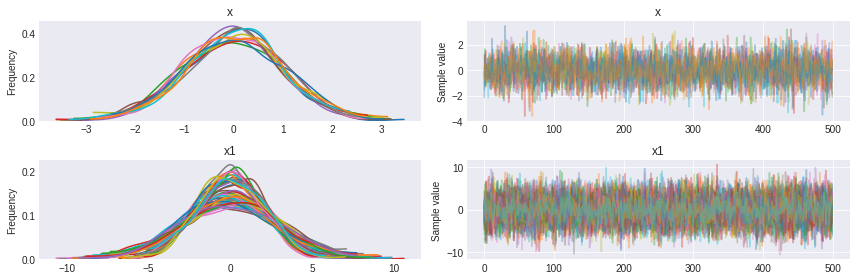

In [5]:
pm.traceplot(tr);

In [6]:
from pymc3.util import get_default_varnames
from pymc3.backends.base import MultiTrace

In [7]:
from scipy.signal import fftconvolve


def autocorr(x, lag=None):
    """
    Compute autocorrelation using FFT for every lag for the input array
    https://en.wikipedia.org/wiki/Autocorrelation#Efficient_computation

    Parameters
    ----------
    x : Numpy array
        An array containing MCMC samples

    Returns
    -------
    acorr: Numpy array same size as the input array
    """
    y = x - x.mean()
    n = len(y)
    result = fftconvolve(y, y[::-1])
    acorr = result[len(result) // 2:]
    acorr /= np.arange(n, 0, -1)
    acorr /= acorr[0]
    if lag is None:
        return acorr
    else:
        warnings.warn(
            "The `lag` argument has been deprecated. If you want to get "
            "the value of a specific lag please call `autocorr(x)[lag]`.",
            DeprecationWarning)
        return acorr[lag]


def autocov(x, lag=None):
    """Compute autocovariance estimates for every lag for the input array

    Parameters
    ----------
    x : Numpy array
        An array containing MCMC samples

    Returns
    -------
    acov: Numpy array same size as the input array
    """
    acorr = autocorr(x)
    varx = np.var(x, ddof=1) * (len(x) - 1) / len(x)
    acov = acorr * varx
    if lag is None:
        return acov
    else:
        warnings.warn(
            "The `lag` argument has been deprecated. If you want to get "
            "the value of a specific lag please call `autocov(x)[lag]`.",
            DeprecationWarning)
        return acov[lag]

In [8]:
def effective_n(mtrace, varnames=None, include_transformed=False):
    R"""Returns estimate of the effective sample size of a set of traces.

    Parameters
    ----------
    mtrace : MultiTrace or trace object
      A MultiTrace object containing parallel traces (minimum 2)
      of one or more stochastic parameters.
    varnames : list
      Names of variables to include in the effective_n report
    include_transformed : bool
      Flag for reporting automatically transformed variables in addition
      to original variables (defaults to False).

    Returns
    -------
    n_eff : dictionary of floats (MultiTrace) or float (trace object)
        Return the effective sample size, :math:`\hat{n}_{eff}`

    Notes
    -----
    The diagnostic is computed by:

    .. math:: \hat{n}_{eff} = \frac{mn}{1 + 2 \sum_{t=1}^T \hat{\rho}_t}

    where :math:`\hat{\rho}_t` is the estimated autocorrelation at lag t, and T
    is the first odd positive integer for which the sum
    :math:`\hat{\rho}_{T+1} + \hat{\rho}_{T+1}` is negative.

    The current implementation is similar to Stan, which uses Geyer's initial
    monotone sequence criterion (Geyer, 1992; Geyer, 2011).

    References
    ----------
    Gelman et al. BDA (2014)"""

    def get_neff(x):
        """Compute the effective sample size for a 2D array
        """
        trace_value = x.T
        nchain, n_samples = trace_value.shape

        acov = np.asarray([autocov(trace_value[chain])
                           for chain in range(nchain)])

        chain_mean = trace_value.mean(axis=1)
        chain_var = acov[:, 0] * n_samples / (n_samples - 1.)
        acov_t = acov[:, 1] * n_samples / (n_samples - 1.)
        mean_var = np.mean(chain_var)
        var_plus = mean_var * (n_samples - 1.) / n_samples
        var_plus += np.var(chain_mean, ddof=1)

        rho_hat_t = np.zeros(n_samples)
        rho_hat_even = 1.
        rho_hat_t[0] = rho_hat_even
        rho_hat_odd = 1. - (mean_var - np.mean(acov_t)) / var_plus
        rho_hat_t[1] = rho_hat_odd
        # Geyer's initial positive sequence
        max_t = 1
        t = 1
        while t < (n_samples - 2) and (rho_hat_even + rho_hat_odd) >= 0.:
            rho_hat_even = 1. - (mean_var - np.mean(acov[:, t + 1])) / var_plus
            rho_hat_odd = 1. - (mean_var - np.mean(acov[:, t + 2])) / var_plus
            if (rho_hat_even + rho_hat_odd) >= 0:
                rho_hat_t[t + 1] = rho_hat_even
                rho_hat_t[t + 2] = rho_hat_odd
            max_t = t + 2
            t += 2

        # Geyer's initial monotone sequence
        t = 3
        while t <= max_t - 2:
            if (rho_hat_t[t + 1] + rho_hat_t[t + 2]) > (rho_hat_t[t - 1] + rho_hat_t[t]):
                rho_hat_t[t + 1] = (rho_hat_t[t - 1] + rho_hat_t[t]) / 2.
                rho_hat_t[t + 2] = rho_hat_t[t + 1]
            t += 2
        ess = nchain * n_samples
        ess = ess / (-1. + 2. * np.sum(rho_hat_t))
        return ess

    def generate_neff(trace_values):
        x = np.array(trace_values)
        shape = x.shape

        # Make sure to handle scalars correctly, adding extra dimensions if
        # needed. We could use np.squeeze here, but we don't want to squeeze
        # out dummy dimensions that a user inputs.
        if len(shape) == 2:
            x = np.atleast_3d(trace_values)

        # Transpose all dimensions, which makes the loop below
        # easier by moving the axes of the variable to the front instead
        # of the chain and sample axes.
        x = x.transpose()

        # Get an array the same shape as the var
        _n_eff = np.zeros(x.shape[:-2])

        # Iterate over tuples of indices of the shape of var
        for tup in np.ndindex(*list(x.shape[:-2])):
            _n_eff[tup] = get_neff(x[tup])

        if len(shape) == 2:
            return _n_eff[0]

        return np.transpose(_n_eff)

    if not isinstance(mtrace, MultiTrace):
        # Return neff for non-multitrace array
        return generate_neff(mtrace)

    if mtrace.nchains < 2:
        raise ValueError(
            'Calculation of effective sample size requires multiple chains '
            'of the same length.')

    if varnames is None:
        varnames = get_default_varnames(
            mtrace.varnames, include_transformed=include_transformed)

    n_eff = {}

    for var in varnames:
        n_eff[var] = generate_neff(mtrace.get_values(var, combine=False))

    return n_eff

In [9]:
%timeit effective_n(tr)

13.3 ms ± 90.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
%timeit pm.effective_n(tr)

2.83 ms ± 72.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
effective_n(tr)

{'x': array([2003.57356909, 1808.67601819, 1307.7805487 ]),
 'x1': array([[3114.90712378, 1892.18853343, 1501.0959557 ],
        [2422.33278151, 1818.81308452, 1528.10797043],
        [3053.55440685, 1812.63343487, 1525.18825634],
        [2865.38361361, 2022.29708201, 1581.95449483],
        [3453.18298235, 1948.20605856, 1757.84965   ]])}

In [12]:
pm.effective_n(tr)

{'x': array([1929., 1983., 1196.]), 'x1': array([[2000., 1924., 1480.],
        [2000., 1823., 1518.],
        [2000., 1739., 1545.],
        [2000., 1894., 1589.],
        [2000., 2000., 1748.]])}